<a href="https://colab.research.google.com/github/nimeshayasith/Computer_vision_Assignment/blob/main/4624_Question_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Update this path if you named your folder something else
project_path = '/content/drive/MyDrive/CV_Assessment_01'

# Change the current working directory
os.chdir(project_path)

# Verify you are in the right place
print("Current Working Directory:", os.getcwd())
print("Files in Dataset folder:", os.listdir('Dataset'))

Current Working Directory: /content/drive/MyDrive/CV_Assessment_01
Files in Dataset folder: ['IPCV_ ASSIGNMENT_01_DATABASE.zip', 'IPCV_ ASSIGNMENT_01_DATABASE']


Generating noise...
Applying 3x3 median filter...
Applying 5x5 median filter...
Applying 11x11 median filter...


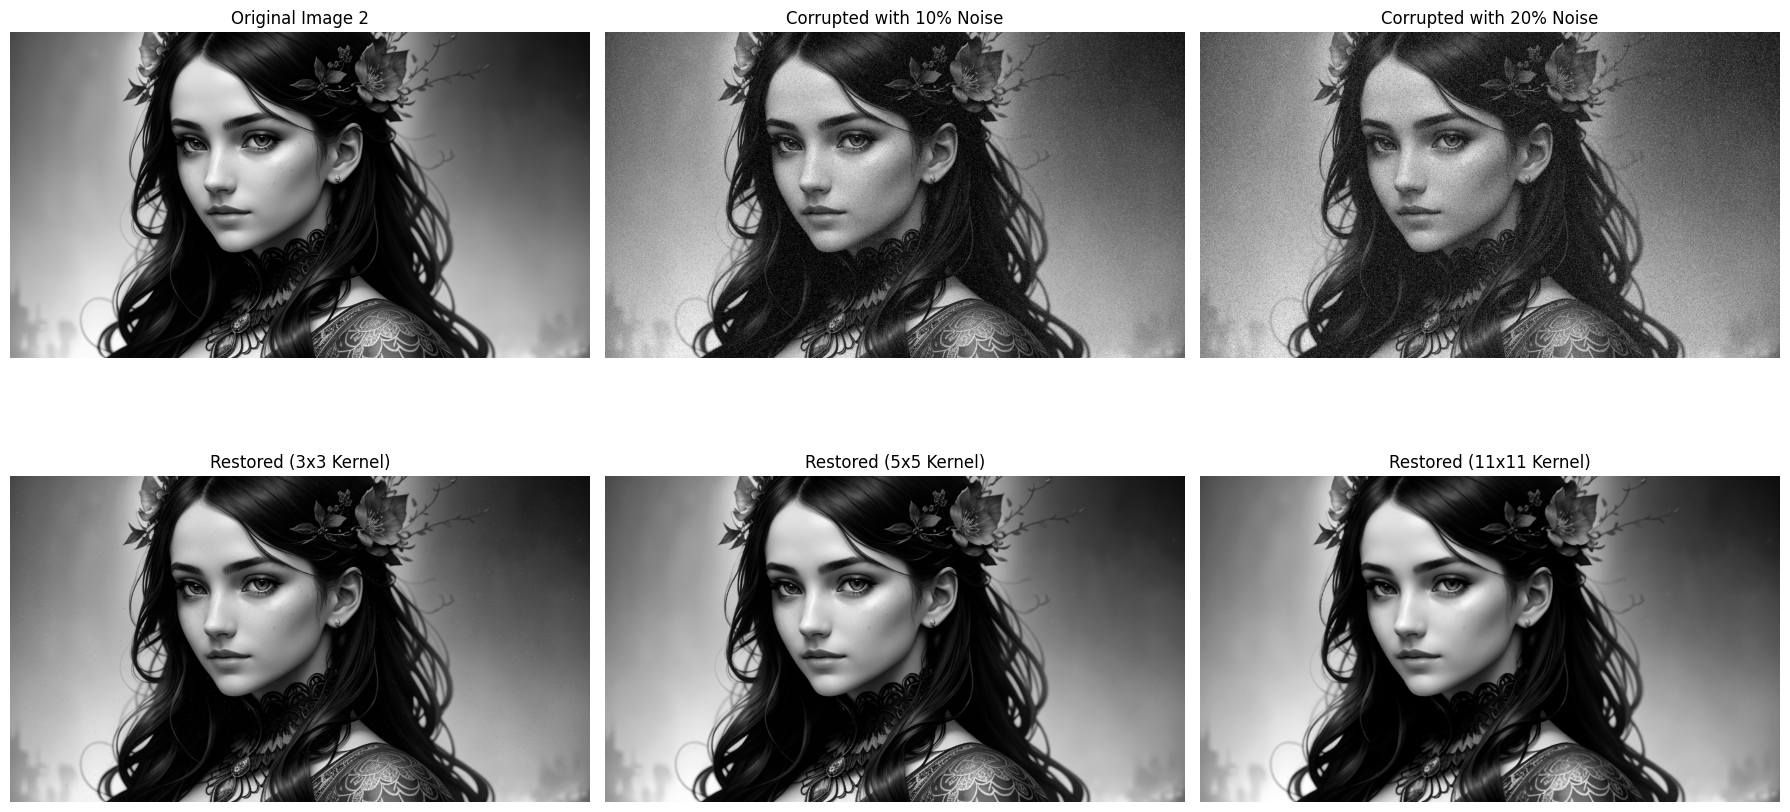

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# --- PART 1: Function to Add Salt & Pepper Noise ---
def add_salt_and_pepper_noise(image, noise_ratio):
    """
    Adds salt (white) and pepper (black) noise to an image.
    noise_ratio: percentage of pixels to corrupt (e.g., 0.1 for 10%)
    """
    noisy_img = np.copy(image)
    h, w = noisy_img.shape
    total_pixels = h * w

    # 1. Determine how many pixels to corrupt
    num_noise_pixels = int(total_pixels * noise_ratio)

    # 2. Randomly pick coordinates to corrupt
    # We pick flat indices (0 to total_pixels) and convert them to (y, x) later
    noise_indices = random.sample(range(total_pixels), num_noise_pixels)

    # 3. Assign Salt (255) to half and Pepper (0) to the other half
    for i, idx in enumerate(noise_indices):
        y = idx // w  # Integer division to get row
        x = idx % w   # Modulo to get column

        if i < num_noise_pixels // 2:
            noisy_img[y, x] = 255 # Salt (White)
        else:
            noisy_img[y, x] = 0   # Pepper (Black)

    return noisy_img

# --- PART 2: Custom Median Filter Implementation ---
def custom_median_filter(image, kernel_size):
    """
    Applies a custom median filter to a grayscale image using nested loops.
    """
    h, w = image.shape
    pad = kernel_size // 2

    # Pad image to handle borders
    padded_img = np.pad(image, pad, mode='reflect')
    output_img = np.zeros_like(image)

    # Sliding Window Operation
    print(f"Applying {kernel_size}x{kernel_size} median filter...")
    for y in range(h):
        for x in range(w):
            # 1. Extract the neighborhood (Region of Interest)
            roi = padded_img[y:y+kernel_size, x:x+kernel_size]

            # 2. Compute Median: Flatten array -> Sort -> Pick middle value
            # This is the key difference from Average filtering!
            median_val = np.median(roi)

            output_img[y, x] = median_val

    return output_img

# --- EXECUTION ---

# Define path (adjust filename if actual file is 'image_2.png' etc.)
img_2_path = '/content/drive/MyDrive/CV_Assessment_01/Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Images_ For_Preliminary_Part/Image_2.jpg'
img_2 = cv2.imread(img_2_path, cv2.IMREAD_GRAYSCALE)

if img_2 is None:
    print(f"Error: Could not load {img_2_path}. Check file extension.")
else:
    # [cite_start]1. Create Noisy Versions [cite: 33-34]
    print("Generating noise...")
    noisy_10 = add_salt_and_pepper_noise(img_2, 0.10) # 10% noise
    noisy_20 = add_salt_and_pepper_noise(img_2, 0.20) # 20% noise

    # [cite_start]2. Apply Median Filter to the 20% noisy image [cite: 36-37]
    # We use the 20% image because it's harder to clean, showing the filter's power better.
    filtered_3x3 = custom_median_filter(noisy_20, 3)
    filtered_5x5 = custom_median_filter(noisy_20, 5)
    filtered_11x11 = custom_median_filter(noisy_20, 11) # This may take 10-20 seconds

    # --- PLOTTING RESULTS ---
    plt.figure(figsize=(18, 10))

    # Top Row: Noise Generation
    plt.subplot(2, 3, 1)
    plt.imshow(img_2, cmap='gray')
    plt.title("Original Image 2")
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(noisy_10, cmap='gray')
    plt.title("Corrupted with 10% Noise")
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(noisy_20, cmap='gray')
    plt.title("Corrupted with 20% Noise")
    plt.axis('off')

    # Bottom Row: Filtering Results (on 20% noise)
    plt.subplot(2, 3, 4)
    plt.imshow(filtered_3x3, cmap='gray')
    plt.title("Restored (3x3 Kernel)")
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(filtered_5x5, cmap='gray')
    plt.title("Restored (5x5 Kernel)")
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(filtered_11x11, cmap='gray')
    plt.title("Restored (11x11 Kernel)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()